In [44]:
include("src/JuliaPhonons.jl")
using JuliaPhonons
using PyPlot

In [233]:
# note that the results from the iodine interstitial in MAPI at PBEsol level of theory dont make great sense
# as the negative was not relaxed from the neutral case.
# this has been fixed for HSE06 but I have not done the phonons yet...


poscar_neutral = JuliaPhonons.read_POSCAR(open("./examples/MAPI_H_centre/neutral_POSCAR"))
poscar_negative = JuliaPhonons.read_POSCAR(open("./examples/MAPI_H_centre/negative_POSCAR"))
poscar_perfect = JuliaPhonons.read_POSCAR(open("./examples/MAPI_H_centre/perfect_POSCAR"))
phonons_neutral = JuliaPhonons.read_meshyaml(open("./examples/MAPI_H_centre/neutral_mesh.yaml"),poscar_neutral)
phonons_negative = JuliaPhonons.read_meshyaml(open("./examples/MAPI_H_centre/negative_mesh.yaml"),poscar_negative)
phonons_perfect = JuliaPhonons.read_meshyaml(open("./examples/MAPI_H_centre/perfect_mesh.yaml"),poscar_perfect)


[12.5743 0.000853903 0.137524; 0.000141603 12.4741 -0.000835312; 0.138595 -1.31954e-5 12.7567]
Volume: 2000.6757668208738
SubString{String}["C", "N", "H", "Pb", "I"]
POSCAR.natoms: 97
AbstractString["C", "C", "C", "C", "C", "C", "C", "C", "N", "N", "N", "N", "N", "N", "N", "N", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I"]
supercellexpansions ==>Array{Float64,1}[[0.0, 0.0, 0.0]]
[12.5743 0.000853903 0.137524; 0.000141603 12.4741 -0.000835312; 0.138595 -1.31954e-5 12.7567]
Volume: 2000.6757668208738
SubString{String}["C", "N", "H", "Pb", "I"]
POSCAR.natoms: 97
AbstractString["C", "C", "C", "C", "C", "C", "C", "C", "N", "N", "N

(Any[[0.0909134 0.104155 0.00862495; 0.0983182 0.112363 0.0100874; … ; 0.296444 0.337899 0.0287834; 0.301282 0.337792 0.0266648], [0.103906 -0.0888006 -0.0298532; 0.112019 -0.0958573 -0.0318454; … ; 0.33584 -0.288231 -0.0965737; 0.333316 -0.287944 -0.101759], [0.0177765 -0.0265022 0.134911; 0.0189084 -0.02859 0.146352; … ; 0.0576788 -0.0859989 0.440055; 0.0569092 -0.0859566 0.44134], [0.00139734 -0.096189 8.25423e-5; 0.00135372 -0.153166 0.000269111; … ; 0.0016166 -0.0904076 0.0011816; -0.0013526 0.851741 -0.00128379], [0.101602 0.00156059 0.0633646; 0.090599 0.000544892 0.116293; … ; 0.296459 0.00428477 0.4966; -0.16475 -0.00294152 -0.569291], [0.0164859 -0.00238063 0.0358293; 0.0125822 -0.00192689 0.0524691; … ; 0.72516 0.00516873 -0.0579192; -0.081074 -0.00290181 0.464587], [0.00133076 -0.202322 -0.00373144; 0.0010399 -0.202927 -0.00348954; … ; -0.0113752 0.253608 -0.00858101; -0.0004269 -0.249335 -0.000658783], [0.0905063 0.0040615 -0.0868587; 0.117656 0.00373707 -0.139297; … ; -0.

In [50]:
displacement =  poscar_neutral.positions.-poscar_negative.positions 

# check to see if any that shifted more than half a unit cell - in this case it is more likely 
# that moved into a neighbouring cell.
# I have been careful to define this so that if the start and end points are interchanged the displacement stays the same.
for i = 1:size(displacement,2)
    for j = 1:size(displacement,1)
        if (displacement[j,i]) > 0.5
            displacement[j,i] = 1-(displacement[j,i])
            
        end
        if (displacement[j,i]) < -0.5
            displacement[j,i] = -1-(displacement[j,i])
            
        end
    end
end


In [230]:
# scalar projection https://en.wikipedia.org/wiki/Dot_product
# abs or no?
projections = []
for eigenvector in phonons_negative[1]   # projecting onto negative as these are stable imaginary in neutral phonon :(
    push!(projections,abs(dot(displacement,eigenvector)))
end

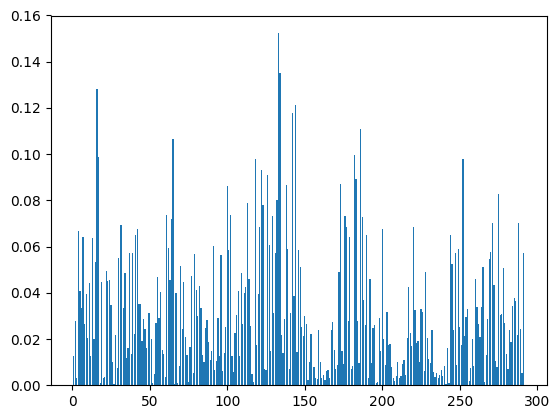

(PyObject <matplotlib.patches.Rectangle object at 0x278039438>, PyObject <matplotlib.patches.Rectangle object at 0x278039240>, PyObject <matplotlib.patches.Rectangle object at 0x278039a58>, PyObject <matplotlib.patches.Rectangle object at 0x278039dd8>, PyObject <matplotlib.patches.Rectangle object at 0x26e1b7198>, PyObject <matplotlib.patches.Rectangle object at 0x26e1b7518>, PyObject <matplotlib.patches.Rectangle object at 0x26e1b7898>, PyObject <matplotlib.patches.Rectangle object at 0x26e1b7c18>, PyObject <matplotlib.patches.Rectangle object at 0x26e1b7f98>, PyObject <matplotlib.patches.Rectangle object at 0x1df02c358>, PyObject <matplotlib.patches.Rectangle object at 0x1df02c6d8>, PyObject <matplotlib.patches.Rectangle object at 0x1df02ca58>, PyObject <matplotlib.patches.Rectangle object at 0x1df02cdd8>, PyObject <matplotlib.patches.Rectangle object at 0x1df01e198>, PyObject <matplotlib.patches.Rectangle object at 0x1df01e518>, PyObject <matplotlib.patches.Rectangle object at 0x1df

In [231]:
PyPlot.bar(1:3*poscar_negative.natoms,projections)

In [53]:
# Not sure if this should be abs or not. Gives the phonon modes which contribute to the distortion.
# Perhaps  abs: num modes = num_atoms * 3 (for each dimension) 
# could be used to analyse (with three-phonon phase space) how efficiently heat will propagate away
for (i,item) in enumerate(projections)
 if abs(item) > 0.1
        println(i)
    end
    end

16
65
133
134
142
144
186


In [41]:
# see "MAPI_iodine_defect_phonons.ipynb" and "MAPI_iodine_defect_stacked_barchart" for more analysis (in Python...)
# but this should be built into Julia workflow
mode_num = 16
mode_data = JuliaPhonons.decompose_eigenmode_atom_contributions(poscar_negative,phonons_negative[2][mode_num],phonons_negative[1][mode_num])

Normalising sum (Energy): 7.053255057997925 Normalising sum (Displacement): 1.363976720410302
Mode: -0.004956748 Atom: 1 C	 EnergyFraction: 0.006847164223511023	 DisplacementFraction: 0.010216964193879505	 PR-E: 0.0023323872909727294
Mode: -0.004956748 Atom: 2 C	 EnergyFraction: 0.006898894150566914	 DisplacementFraction: 0.010294152763516442	 PR-E: 0.0023677625173570156
Mode: -0.004956748 Atom: 3 C	 EnergyFraction: 0.00688502351838314	 DisplacementFraction: 0.010273455764329321	 PR-E: 0.002358251037253056
Mode: -0.004956748 Atom: 4 C	 EnergyFraction: 0.006904434782575247	 DisplacementFraction: 0.010302420191752823	 PR-E: 0.002371567234032962
Mode: -0.004956748 Atom: 5 C	 EnergyFraction: 0.006986512393226994	 DisplacementFraction: 0.010424891916071724	 PR-E: 0.0024282871714532157
Mode: -0.004956748 Atom: 6 C	 EnergyFraction: 0.00688306992262529	 DisplacementFraction: 0.010270540715521418	 PR-E: 0.0023569129399780057
Mode: -0.004956748 Atom: 7 C	 EnergyFraction: 0.00695794771318856	 Dis

Mode: -0.004956748 Atom: 68 Pb	 EnergyFraction: 0.02857551536708781	 DisplacementFraction: 0.010265540650678515	 PR-E: 0.04062256305400548
Mode: -0.004956748 Atom: 69 Pb	 EnergyFraction: 0.02860859113030962	 DisplacementFraction: 0.010277422871787876	 PR-E: 0.040716657587164654
Mode: -0.004956748 Atom: 70 Pb	 EnergyFraction: 0.028577176630425787	 DisplacementFraction: 0.010266137447135495	 PR-E: 0.04062728644992492
Mode: -0.004956748 Atom: 71 Pb	 EnergyFraction: 0.028580055265605527	 DisplacementFraction: 0.010267171575341986	 PR-E: 0.04063547179502766
Mode: -0.004956748 Atom: 72 Pb	 EnergyFraction: 0.028574272955521677	 DisplacementFraction: 0.010265094323594884	 PR-E: 0.04061903074010911
Mode: -0.004956748 Atom: 73 I	 EnergyFraction: 0.02238370026099777	 DisplacementFraction: 0.010275044262904928	 PR-E: 0.02492544617501361
Mode: -0.004956748 Atom: 74 I	 EnergyFraction: 0.02239189368396306	 DisplacementFraction: 0.010278805382945466	 PR-E: 0.02494369714320593
Mode: -0.004956748 Atom: 

In [144]:
# idea for the distribution function from https://aip.scitation.org/doi/pdf/10.1063/1.4984833?class=pdf
# it projects a mode onto the basis set of another charge state or the perfect cell.
# if it is broad across perfect cell modes --> it is a localised state, as it cannot be well described by the delocalised modes of perfect cell

distribution_function = []
for neut_mode in phonons_neutral[1]
    for neg_mode in phonons_negative[1]
    push!(distribution_function,(dot(neut_mode,neg_mode)^2))
    end
end

distribution_function = reshape(distribution_function,3*poscar_negative.natoms,3*poscar_neutral.natoms)

291×291 Array{Any,2}:
 2.67578e-7   0.364643     6.49538e-5   …  7.14937e-11  1.65079e-12
 9.24254e-9   0.46886      0.267407        8.72513e-11  3.14329e-10
 3.61811e-8   0.166485     0.732525        6.77958e-12  5.52118e-11
 0.0292077    6.69461e-7   1.50492e-9      4.05006e-7   0.00016245 
 0.0109813    8.41929e-7   8.08201e-7      4.36769e-5   2.4063e-7  
 0.00219297   2.42571e-7   8.77881e-7   …  8.37067e-6   1.8654e-5  
 0.00884892   6.65466e-7   6.48152e-9      1.41476e-5   2.29365e-5 
 0.00506396   3.6485e-8    5.70195e-11     2.86278e-5   6.83268e-5 
 0.010684     7.33569e-9   8.17341e-9      2.84863e-5   1.5066e-7  
 0.000399789  2.45739e-10  4.78504e-8      8.68955e-6   3.40406e-7 
 5.99814e-5   1.18147e-8   1.07367e-7   …  4.62962e-6   4.18371e-6 
 9.1087e-5    4.04304e-7   5.29486e-8      1.37814e-5   3.77568e-6 
 9.23825e-7   3.50915e-11  1.37067e-8      2.9603e-6    2.09921e-5 
 ⋮                                      ⋱               ⋮          
 5.40418e-8   9.68842e-12 

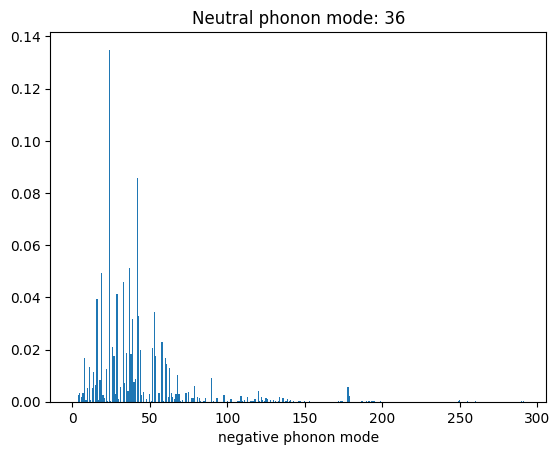

24

In [145]:
## this tells us which modes have shifted up or down in energy

i=36

PyPlot.bar(1:3*poscar_negative.natoms,distribution_function[:,i])
PyPlot.xlabel("negative phonon mode")
PyPlot.title(string("Neutral phonon mode: ",i))

indmax(distribution_function[:,i])

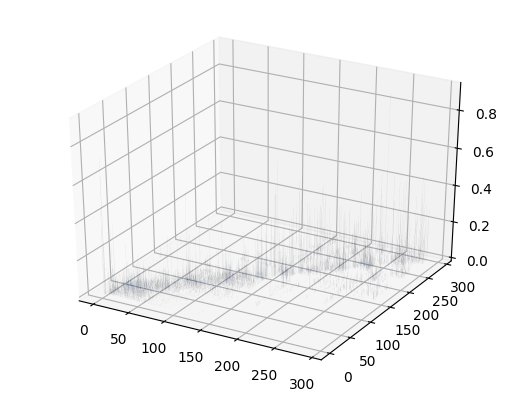

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x246135518>

In [146]:
# Plot in 3D
# not much documentation, this prob most useful: https://matplotlib.org/gallery/mplot3d/3d_bars.html
# Note that arrays should not be Any type as Python does not like

A=zeros(3*poscar_neutral.natoms,3*poscar_neutral.natoms)
B=zeros(3*poscar_neutral.natoms,3*poscar_neutral.natoms)
for i in 1:3*poscar_neutral.natoms
A[i,:] = i
B[:,i] = i
end

y=collect(Iterators.flatten(A))
x=collect(Iterators.flatten(B))
bottom=fill(0,3*poscar_neutral.natoms*3*poscar_neutral.natoms)
width=0.01
depth=0.01
top=convert(Array{Float64,1}, collect(Iterators.flatten(distribution_function)))


PyPlot.bar3D(x,y,bottom,width,depth,top)

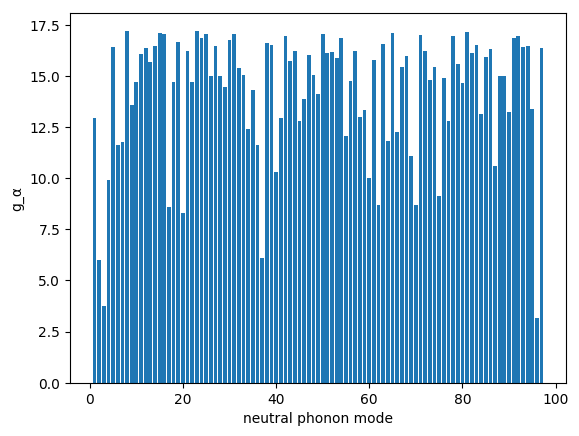

PyObject Text(24,0.5,'g_α')

In [228]:
# the cutoff here seems a little bit arbitrary; am I inerpreting the appraoch in Gao et al correctly? - Hmmm, no!
# the localised modes are the ones with a small g-value

g = []
for i in 1:poscar_neutral.natoms
    # lots going on here. First filter so anything less than 0.05, the cutoff, is not included. Then find the minimum and take reciprocal.
    push!(g,maximum(1 ./ minimum(distribution_function[:,i][distribution_function[:,i] .> 0.058])))
    end
PyPlot.bar(collect(1:poscar_neutral.natoms),convert(Array{Float64,1},g))
PyPlot.xlabel("neutral phonon mode")
PyPlot.ylabel("g_α")


In [356]:
## distribution function for dot product with perfect 

# need to insert zero-valued eigenvectors (x3) where the interstitial defect supercell is, so must specify atom number
defect_atom_num = 96
num_defects = length(defect_atom_num)

# build perfect basis set of same dimension as defect supercell basis set
# can re-factor this so it is quicker (and easier to read), a WIP - output is confirmed sane though.
expanded_basis_set = Array{Any,1}(3*(poscar_perfect.natoms+num_defects)*num_unit_cells)
basis_index=1
defects_found = 0
for expanded_atom_num in 1:(3*(poscar_perfect.natoms+num_defects))  # outer loops take each atom eigenvector and repeats
    for _ in 1:num_unit_cells   # repeat for each unit cell, use throwaway variable
       expanded_eigenvector = Array{Float64,2}((poscar_perfect.natoms+num_defects)*num_unit_cells,3)
       eigenvector_index=1
       for atom_num in 1:(poscar_perfect.natoms+num_defects) # inner loops takes elements of each atom eigenvector and repeats
            if eigenvector_index == defect_atom_num
                defects_found +=1
            end
            for _ in 1:num_unit_cells # repeat for each unit cell
               if eigenvector_index == defect_atom_num
                    expanded_eigenvector[eigenvector_index,:] = [0.0,0.0,0.0]
                    
               else 
                   expanded_eigenvector[eigenvector_index,:]=phonons_perfect[1][expanded_atom_num-(3*defects_found)][atom_num-defects_found,:] 
               end
               eigenvector_index += 1
           end 
       end
       expanded_basis_set[basis_index]=expanded_eigenvector
       basis_index += 1
    end
end
expanded_basis_set[1]


LoadError: [91mBoundsError: attempt to access 12×3 Array{Float64,2} at index [13, Base.Slice(Base.OneTo(3))][39m

In [341]:
[0.0,0.0,0.0]

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

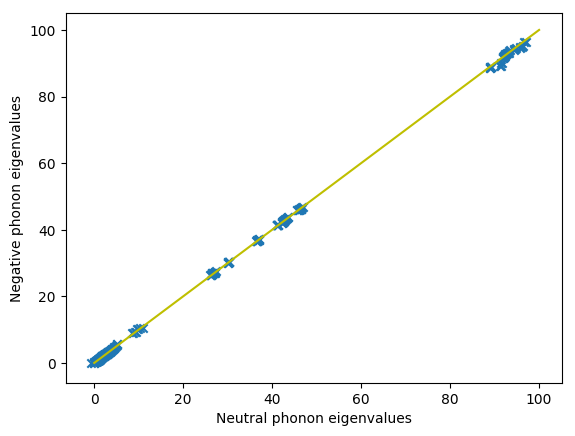

PyObject Text(24,0.5,'Negative phonon eigenvalues')

In [215]:
## simple comparison - how the eigenvalues have been perturbed by change in charge state

PyPlot.plot([0,100],[0,100],color="y")
PyPlot.scatter(phonons_neutral[2],phonons_negative[2],marker="x")
PyPlot.xlabel("Neutral phonon eigenvalues")
PyPlot.ylabel("Negative phonon eigenvalues")